In [164]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
from sklearn.cluster import KMeans, DBSCAN

from sklearn.model_selection import train_test_split

# Oversampling/undersampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from sklearn import metrics

%matplotlib inline

# To do:
1. Annotate code
2. Provide inline expanation where needed
3. Build and optimize boosted classifer

In [231]:
data = pd.read_csv('google_review_ratings.csv')
data.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


#### Column Unamed: 25 is almost all NaNs. Lets drop it

In [232]:
data.drop('Unnamed: 25', axis='columns', inplace=True)

#### Rename columns

In [233]:
data.columns=['user_id', 'rtg_churches', 'rtg_resorts', 'rtg_beaches', 'rtg_parks', 'rtg_theathers', 'rtg_museums',
              'rtg_malls', 'rtg_zoo', 'rtg_restaurants', 'rtg_pubs_bars', 'rtg_local_service', 
              'rtg_burger_pizza_shops', 'rtg_hotels_other_lodgins', 'rtg_juice_bars',
              'rtg_art_galleries', 'rtg_dance_clubs', 'rtg_swimming_pools',
              'rtg_gyms', 'rtg_bakeries', 'rtg_beauty_spas', 'rtg_cafes',
              'rtg_view_points', 'rtg_monuments', 'rtg_gardens']

In [234]:
data.head()

,user_id,rtg_churches,rtg_resorts,rtg_beaches,rtg_parks,rtg_theathers,rtg_museums,rtg_malls,rtg_zoo,rtg_restaurants,...,rtg_art_galleries,rtg_dance_clubs,rtg_swimming_pools,rtg_gyms,rtg_bakeries,rtg_beauty_spas,rtg_cafes,rtg_view_points,rtg_monuments,rtg_gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


#### Check for nulls

In [235]:
data.isnull().sum()

user_id                     0
rtg_churches                0
rtg_resorts                 0
rtg_beaches                 0
rtg_parks                   0
rtg_theathers               0
rtg_museums                 0
rtg_malls                   0
rtg_zoo                     0
rtg_restaurants             0
rtg_pubs_bars               0
rtg_local_service           0
rtg_burger_pizza_shops      1
rtg_hotels_other_lodgins    0
rtg_juice_bars              0
rtg_art_galleries           0
rtg_dance_clubs             0
rtg_swimming_pools          0
rtg_gyms                    0
rtg_bakeries                0
rtg_beauty_spas             0
rtg_cafes                   0
rtg_view_points             0
rtg_monuments               0
rtg_gardens                 1
dtype: int64

#### Just one null. Lets drop it

In [236]:
data.dropna(inplace=True)

In [237]:
data.isnull().sum()

user_id                     0
rtg_churches                0
rtg_resorts                 0
rtg_beaches                 0
rtg_parks                   0
rtg_theathers               0
rtg_museums                 0
rtg_malls                   0
rtg_zoo                     0
rtg_restaurants             0
rtg_pubs_bars               0
rtg_local_service           0
rtg_burger_pizza_shops      0
rtg_hotels_other_lodgins    0
rtg_juice_bars              0
rtg_art_galleries           0
rtg_dance_clubs             0
rtg_swimming_pools          0
rtg_gyms                    0
rtg_bakeries                0
rtg_beauty_spas             0
rtg_cafes                   0
rtg_view_points             0
rtg_monuments               0
rtg_gardens                 0
dtype: int64

#### Lets check the dtypes

In [238]:
data.dtypes

user_id                      object
rtg_churches                float64
rtg_resorts                 float64
rtg_beaches                 float64
rtg_parks                   float64
rtg_theathers               float64
rtg_museums                 float64
rtg_malls                   float64
rtg_zoo                     float64
rtg_restaurants             float64
rtg_pubs_bars               float64
rtg_local_service            object
rtg_burger_pizza_shops      float64
rtg_hotels_other_lodgins    float64
rtg_juice_bars              float64
rtg_art_galleries           float64
rtg_dance_clubs             float64
rtg_swimming_pools          float64
rtg_gyms                    float64
rtg_bakeries                float64
rtg_beauty_spas             float64
rtg_cafes                   float64
rtg_view_points             float64
rtg_monuments               float64
rtg_gardens                 float64
dtype: object

#### rtg_local_service is object should be numerical like the rest. Lets see if there are any invalid entried. Otherwise let change it to float

In [239]:
data.rtg_local_service.unique()

array(['1.7', '1.73', '1.71', '1.69', '1.67', '1.65', '1.66', '1.64',
       '1.63', '5', '1.56', '1.55', '1.53', '1.52', '1.51', '1.5', '1.49',
       '1.48', '1.46', '2.13', '2.12', '2.1', '2.09', '2.08', '2.07',
       '2.06', '2.05', '2.04', '2.03', '2.01', '2', '1.98', '1.97',
       '1.95', '1.93', '1.91', '1.9', '1.88', '1.86', '1.84', '1.83',
       '1.81', '1.79', '1.77', '1.74', '1.72', '1.68', '1.61', '1.6',
       '1.59', '1.58', '1.99', '2.47', '2.35', '2.48', '2.59', '3.39',
       '2.31', '2.78', '2.79', '2.77', '2.76', '2.75', '2.74', '2.72',
       '2.71', '2.69', '2.68', '2.66', '2.65', '2.63', '2.61', '2.57',
       '2.55', '2.53', '2.51', '2.49', '1.94', '1.92', '1.82', '1.76',
       '1.62', '4.08', '4.04', '4.02', '4.01', '4', '3.99', '3.98',
       '3.96', '3.95', '3.94', '3.93', '3.91', '3.9', '3.88', '3.87',
       '3.86', '3.84', '3.85', '2.17', '3', '2.99', '2.82', '2.83',
       '2.81', '2.8', '2.73', '2.67', '2.64', '2.62', '2.54', '2.52',
       '2.5', '2.

#### No invalid entries. Lets change dtype to float

In [240]:
data['rtg_local_service'] = pd.to_numeric(data.rtg_local_service, downcast='float', errors='raise')

In [241]:
data.dtypes

user_id                      object
rtg_churches                float64
rtg_resorts                 float64
rtg_beaches                 float64
rtg_parks                   float64
rtg_theathers               float64
rtg_museums                 float64
rtg_malls                   float64
rtg_zoo                     float64
rtg_restaurants             float64
rtg_pubs_bars               float64
rtg_local_service           float32
rtg_burger_pizza_shops      float64
rtg_hotels_other_lodgins    float64
rtg_juice_bars              float64
rtg_art_galleries           float64
rtg_dance_clubs             float64
rtg_swimming_pools          float64
rtg_gyms                    float64
rtg_bakeries                float64
rtg_beauty_spas             float64
rtg_cafes                   float64
rtg_view_points             float64
rtg_monuments               float64
rtg_gardens                 float64
dtype: object

#### Lets drop user_id and then look at some descriptive stats

In [242]:
data_noUser = data.drop('user_id', axis='columns')

In [243]:
# Get the mean of each feature
mean_rev = []

for col in data_noUser.columns:
    mean_rev.append(data_noUser[col].mean())

In [244]:
# Get the median of each feature
median_rev = []

for col in data_noUser.columns:
    median_rev.append(data_noUser[col].median())

In [245]:
# Get the minimum value of each feature
min_rev = []

for col in data_noUser.columns:
    min_rev.append(data_noUser[col].min())

In [246]:
# Get the aximum value of each feature
max_rev = []

for col in data_noUser.columns:
    max_rev.append(data_noUser[col].max())

#### Lets plot these metrics

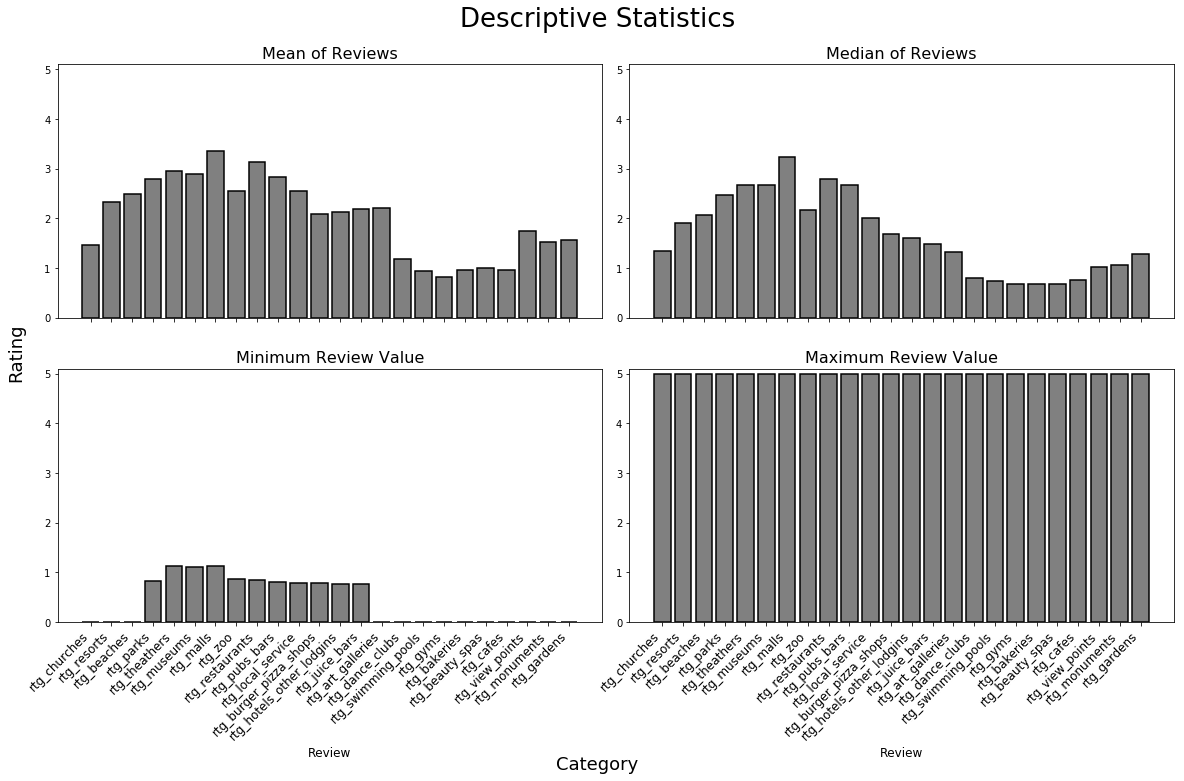

In [247]:
fig, ax = plt.subplots(2, 2, figsize=(20,10), sharex=True)

# Main title
fig.suptitle('Descriptive Statistics', fontsize=26)

# Mean plot
ax[0,0].bar(x=data_noUser.columns, height=mean_rev, color='gray', edgecolor='k', linewidth=1.5)
ax[0,0].set_title('Mean of Reviews', fontsize=16)

# Median plot
ax[0,1].bar(x=data_noUser.columns, height=median_rev, color='gray', edgecolor='k', linewidth=1.5)
ax[0,1].set_title('Median of Reviews', fontsize=16)

# Minimum value plot
ax[1,0].bar(x=data_noUser.columns, height=min_rev, color='gray', edgecolor='k', linewidth=1.5)
ax[1,0].set_title('Minimum Review Value', fontsize=16)
ax[1,0].set_xlabel('Review', fontsize=12)

# Maximum value plot
ax[1,1].bar(x=data_noUser.columns, height=max_rev, color='gray', edgecolor='k', linewidth=1.5)
ax[1,1].set_title('Maximum Review Value', fontsize=16)
ax[1,1].set_xlabel('Review', fontsize=12)

# Rotate X-ticks, set i range lim and eliminate Gridlines
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.grid(False)
    plt.ylim(0, 5.1)

# Main X Label
fig.text(0.5, -0.08, 'Category', ha='center', fontsize=18)

# Main Y Label
fig.text(0.09, 0.5, 'Rating', va='center', rotation='vertical', fontsize=18)

# Adjusting spaces between plots
plt.subplots_adjust(top=0.9, wspace=0.05)


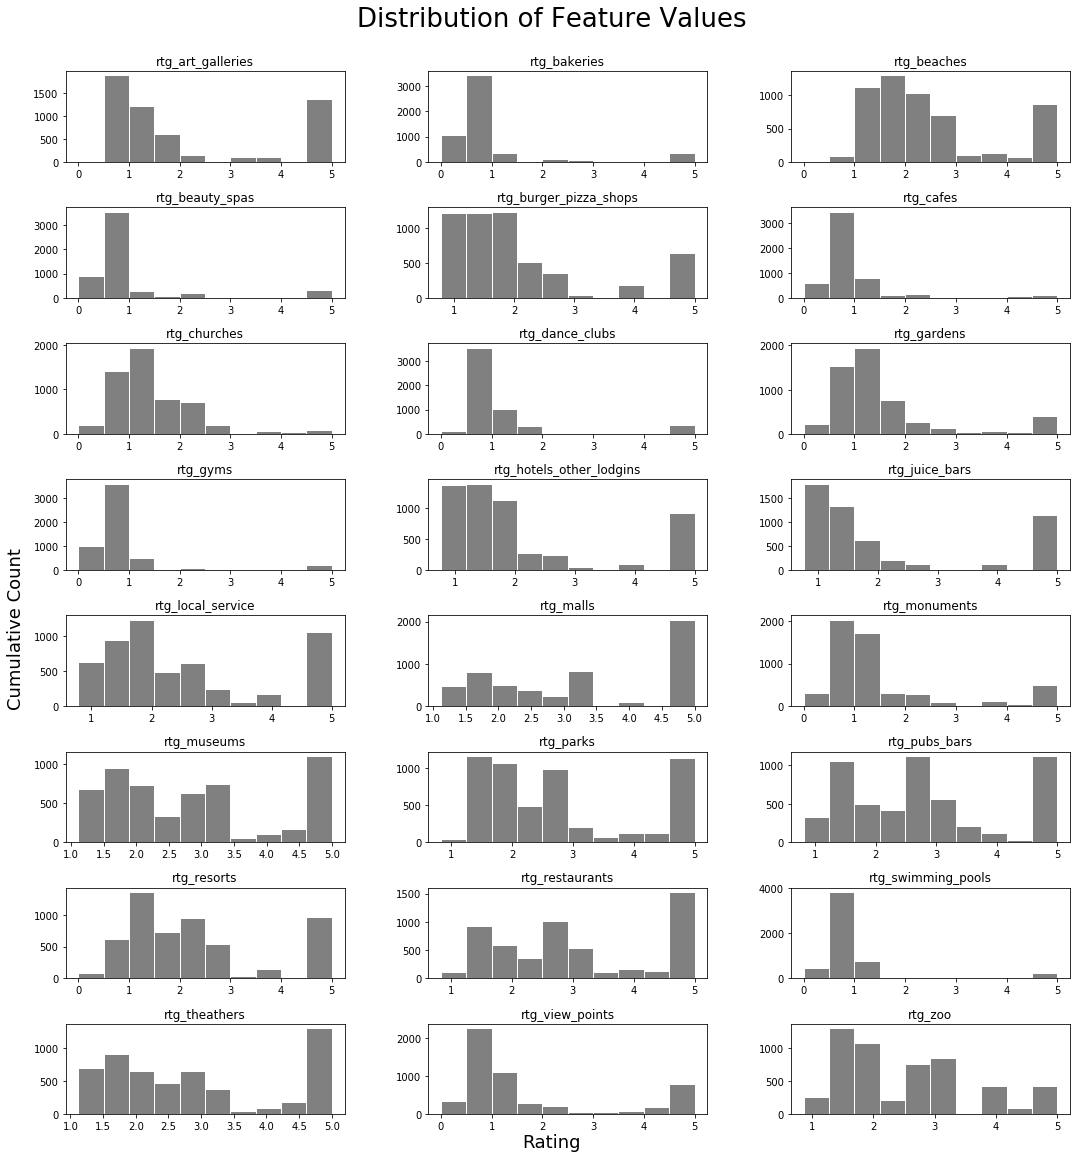

In [294]:
# Lets take a look at the ditribution of values for each feature
fig, axes = plt.subplots(8,3, figsize=(18,18))

# Main title
fig.suptitle('Distribution of Feature Values', fontsize=26)

data_noUser.hist(grid=False, ax=axes, color='gray', edgecolor='white')

# Main X Label
fig.text(0.5, 0.1, 'Rating', ha='center', fontsize=18)

# Main Y Label
fig.text(0.08, 0.5, 'Cumulative Count', va='center', rotation='vertical', fontsize=18)

plt.subplots_adjust(top=0.93, hspace=0.5)

#### Now these data doesn't have any labels or anything that can help me identify groups of users.

#### Lets do some cluster analysis to see if I can identy groups of people within all users.

#### For that I'll start with KMeans clustering.
- For Kmeans we need to specify the number of clusters. A good method for finding a 'good' umber of clusters is by plotting the sum of square distances of data points to their closest cluster center as a function of K (# of clusters). 
- This plot should form an elbow-like plot. A good number of clusters is the 'k' that is in the kink of the elbow.

In [183]:
inertia_cluster = [] # to append sum of squeare distances.

for x in range(1, 25): # from 1 to max number of possible clusters.
    kmeans = KMeans(n_clusters = x, init = 'k-means++', random_state = 6059)
    kmeans.fit(data_noUser)
    inertia_cluster.append(kmeans.inertia_) # append sum of square dist to above list

Text(0.5, 1.0, 'Sum of Square Distances for Different Cluster Numbers')

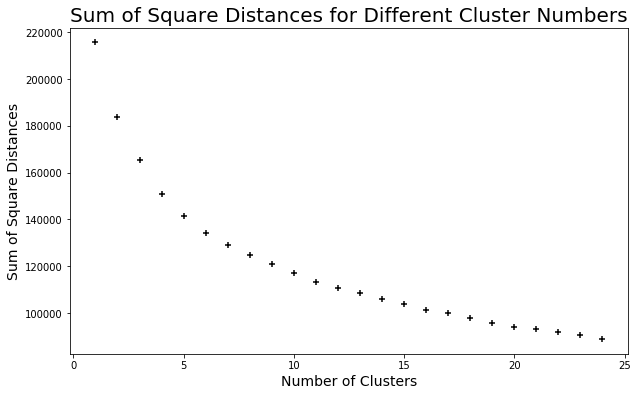

In [184]:
plt.figure(figsize=(10,6))
plt.scatter(x=range(1, 25), y=inertia_cluster, color='k', marker='+')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Sum of Square Distances', fontsize=14)
plt.title('Sum of Square Distances for Different Cluster Numbers', fontsize=20)

#### As can be seen in the above plot, there is no clear/sharp kink in the plot. This may sugest that the data is not easy to cluster. A potential solution to this is to decrease the dimension of the data using a dimensionality reduction algo like PCA.

In [187]:
pca = PCA(n_components = 24) # PCA with maximum number of possible components.
pca.fit_transform(data_noUser)

array([[-1.04699367e+00, -2.55090784e+00, -2.17416548e+00, ...,
        -9.45319798e-02,  1.49107179e-01, -3.45370984e-01],
       [-1.09793072e+00, -2.61894298e+00, -2.11969369e+00, ...,
         5.74889803e-02,  1.80240363e-01, -3.52050194e-01],
       [-1.09999009e+00, -2.61200360e+00, -2.11906891e+00, ...,
         5.70130545e-02,  1.78911138e-01, -3.53968977e-01],
       ...,
       [ 5.92495510e+00,  1.48535922e+00, -1.66141874e-01, ...,
        -7.43330792e-01,  3.77495278e-02, -1.40502977e+00],
       [ 4.71796174e+00,  2.88614509e+00, -7.75863199e-01, ...,
        -6.90517926e-01,  3.94931733e-02, -1.34033280e+00],
       [ 5.90125082e+00,  1.24500420e+00, -3.07054691e-01, ...,
        -6.57133258e-01,  3.24008035e-03, -1.32415878e+00]])

#### We can then plot the ration of explained variance as a function # of components.
#### With that plot we can select the number of components that is sufficient to explained 80 % to 90 % of the variance.

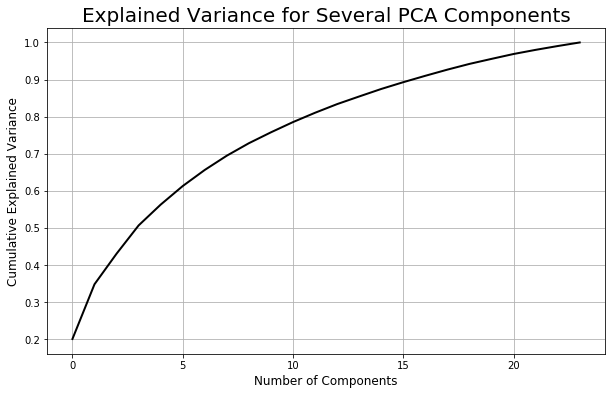

In [188]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', linewidth=2)

plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)

plt.title('Explained Variance for Several PCA Components', fontsize=20)

plt.grid(True)

#### Ideally the above plot shows a sharp increase in explained variance with a few componenets. However, for these data the plot progressively increases and indicated that we need 10 to 15 componets to explained 80 % to 90 % of the variance in the data. This large number of components suggest we can not explained the data with just a few (2 or 3) components.
#### When this is the case we can use nonlinear manifold enbedings to project the data to very few dimensions. For this I will use Isomap.

In [189]:
isomap = Isomap(n_components=2)
projection = isomap.fit_transform(data_noUser)

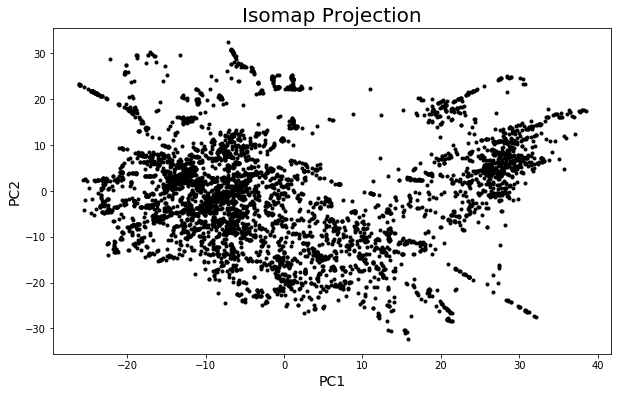

In [190]:
# Plotting the 2-D projection
plt.figure(figsize=(10,6))

plt.scatter(projection[:, 0], projection[:, 1], marker='.', color='k')
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.title('Isomap Projection', fontsize=20)
plt.grid(False)

#### This is very interesting. As expected Isomap conserved potential clusters of data. It is definitely easy to see clusters of points in the above plot.
#### Lets see how KMeans will manage to cluster the data.
### As above, lets first look for how many clusters we need.

In [191]:
inertia_isomap_proj = []

for x in range(1, 25):
    kmeans = KMeans(n_clusters = x, init = 'k-means++', random_state = 6059)
    kmeans.fit(projection)
    inertia_isomap_proj.append(kmeans.inertia_)

Text(0.5, 1.0, 'Sum of Square Distances for Different Cluster Numbers\nUsing Isomap Projected Data')

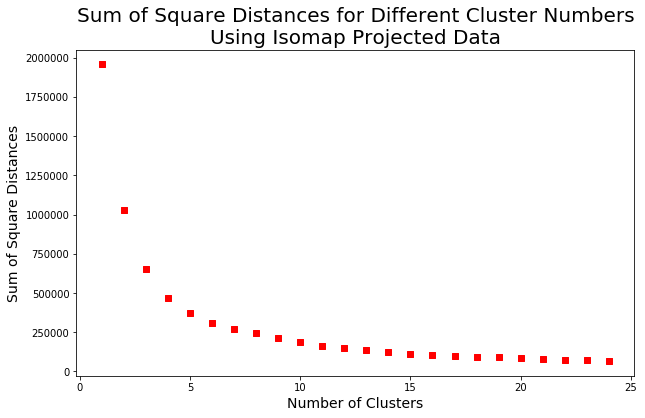

In [192]:
plt.figure(figsize=(10,6))
plt.scatter(x=range(1, 25), y=inertia_isomap_proj, marker='s', color='red')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Sum of Square Distances', fontsize=14)
plt.title('Sum of Square Distances for Different Cluster Numbers\nUsing Isomap Projected Data', fontsize=20)

#### Using the Isomap projected data, there is a more pronounced kink in the sum of square distances plot. Lets plot this as a ratio.

In [193]:
normalized_inertia_isomap = []

for inertia in inertia_isomap_proj:
    normalized_inertia_isomap.append(inertia/np.max(inertia_isomap_proj))

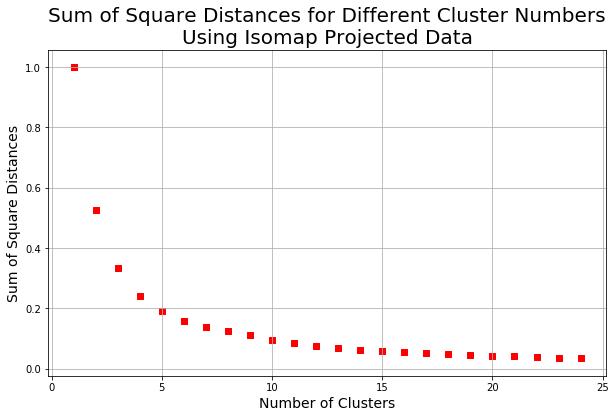

In [194]:
plt.figure(figsize=(10,6))
plt.scatter(x=range(1, 25), y=normalized_inertia_isomap, marker='s', color='red')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Sum of Square Distances', fontsize=14)
plt.title('Sum of Square Distances for Different Cluster Numbers\nUsing Isomap Projected Data', fontsize=20)
plt.grid(True)

#### With 5 clusters there is a decrease of ~80 % in the initial sum of square distances. This could be a good number of clusters.
#### Lets fot the projected data with 5 clusters and plot the cluster centers on top of the data to see if they make sense.

In [195]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(projection)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

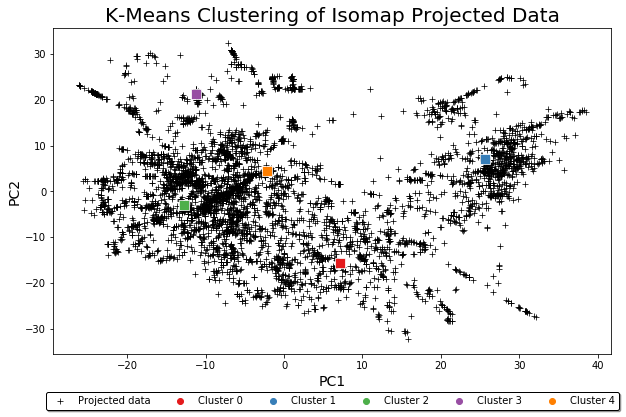

In [196]:
plt.figure(figsize=(10,6))

palette = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']

# Projected data
sns.scatterplot(projection[:, 0], projection[:, 1], marker='+', color='k', label='Projected data')

# Cluster centers
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
                hue=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
                marker='s', s=100, palette=palette)

plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.title('K-Means Clustering of Isomap Projected Data', fontsize=20)

legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
                    fancybox=True, shadow=True, ncol=6).get_frame().set_edgecolor('black')
plt.grid(False)

#### Cluster 2 and 4 don't make a whole lot of sense. That blob of data would make more sense if it is assigned to one single cluster.
#### Lets use DBSCAN to see if my intuition is true. DBSCAN is a clustering algo based in density, so it will cluster points that are densely-packed together.

In [197]:
# min_samples >= dimensions+1

db = DBSCAN(min_samples=30, eps=1.6)
db.fit(projection)

DBSCAN(algorithm='auto', eps=1.6, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=30, n_jobs=None, p=None)

#### Kets see how many clusters we have

In [198]:
labels = db.labels_

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 19
Estimated number of noise points: 1389


#### These data is very sparse. Infact there are 19 densely packed clusters identified by DBSCAN. This is inline with PCA.
#### Lets plot the clusters.

Text(0, 0.5, 'PC2')

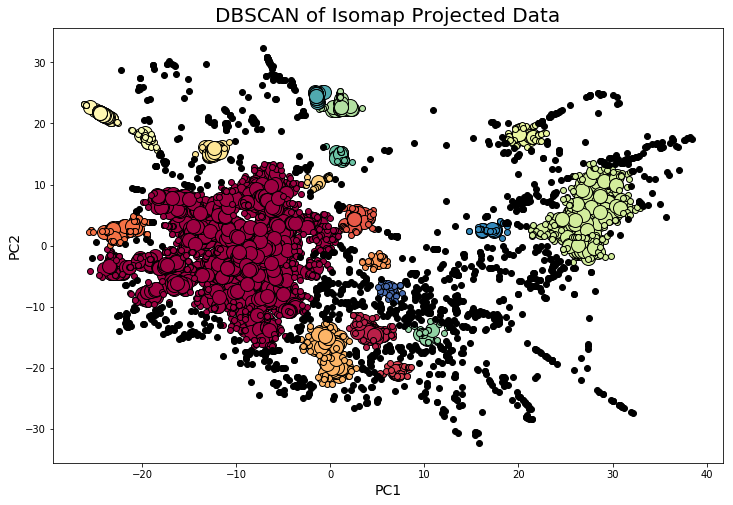

In [199]:
plt.figure(figsize=(12,8))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = projection[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = projection[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
    
plt.title('DBSCAN of Isomap Projected Data', fontsize=20)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)

#### My instuition is likely to be true. The data data assigned to cluster 2 and 4 is densely packed and should be assigned to one clusters. Lets decrease k from 5 to 4 and re-plot the centers agains.

In [200]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(projection)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

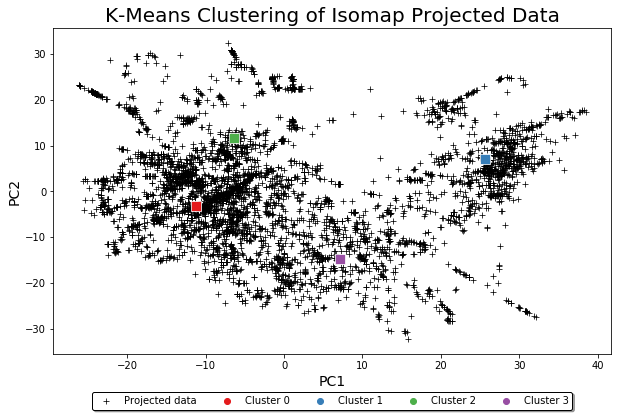

In [201]:
plt.figure(figsize=(10,6))

palette = ['#e41a1c','#377eb8','#4daf4a','#984ea3']

sns.scatterplot(projection[:, 0], projection[:, 1], marker='+', color='k', label='Projected data')
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
                hue=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'],
                marker='s', s=100, palette=palette)

plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.title('K-Means Clustering of Isomap Projected Data', fontsize=20)

legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
                    fancybox=True, shadow=True, ncol=6).get_frame().set_edgecolor('black')
plt.grid(False)

#### The clsuters now make mmore sense. Lets now label the instances according to the clusters they are part off.

In [202]:
data_noUser['labels'] = kmeans.labels_
data_noUser.head()

,rtg_churches,rtg_resorts,rtg_beaches,rtg_parks,rtg_theathers,rtg_museums,rtg_malls,rtg_zoo,rtg_restaurants,rtg_pubs_bars,...,rtg_dance_clubs,rtg_swimming_pools,rtg_gyms,rtg_bakeries,rtg_beauty_spas,rtg_cafes,rtg_view_points,rtg_monuments,rtg_gardens,labels
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0


#### How balance is the data? Probably not very.

Text(0.5, 1.0, 'Number of Samples for Each Label')

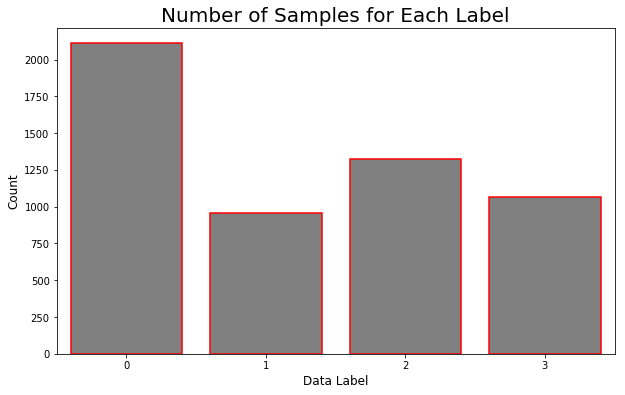

In [203]:
plt.figure(figsize=(10,6))

sns.countplot(data_noUser.labels, color='gray', edgecolor='red', linewidth=1.5)
plt.xlabel('Data Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Samples for Each Label', fontsize=20)

#### Since the data is imbalanced, for classification purposes lets balance the data by oversampling all the minority classes using the SMOTE algo.

In [204]:
X = data_noUser.drop('labels', axis='columns').copy()
y = data_noUser.labels.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6059, stratify=y)

In [205]:
# Oversampling
sm = SMOTE(random_state=6059, sampling_strategy='not majority')
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

Text(0.5, 1.0, 'Number of Oversampled Samples for Each Label')

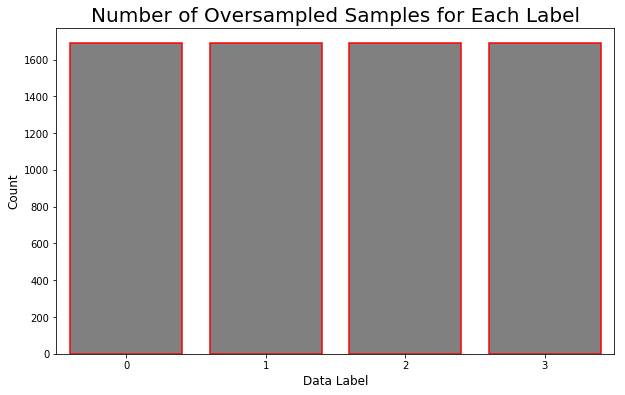

In [206]:
# Is the data balanced now?
plt.figure(figsize=(10,6))

sns.countplot(y_train_res, color='gray', edgecolor='red', linewidth=1.5)
plt.xlabel('Data Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Oversampled Samples for Each Label', fontsize=20)

#### Lets use a logistic regression to classify users using the labels as target.
#### Since data is imbalance lets use precision, recall, and f1 score to measure the performance of the model.

In [207]:
log_clf = LogisticRegression(
    multi_class='multinomial',   # Multiclass clf
    solver='sag',
    max_iter=500                 # Took many iterations for the clf to converge
)

log_clf.fit(X_train_res, y_train_res)

y_pred = log_clf.predict(X_test)

# Lets use precision, recal, and f1-score to see how good the model performed.
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       390
           1       0.97      0.97      0.97       192
           2       0.83      0.80      0.82       275
           3       0.95      0.87      0.91       234

   micro avg       0.88      0.88      0.88      1091
   macro avg       0.90      0.88      0.89      1091
weighted avg       0.88      0.88      0.88      1091



#### The model is perforing quite nice.
#### Lets see if I can obtained a better performance by tweaking the regularization strength

Best params for precision_score
{'C': 0.1}


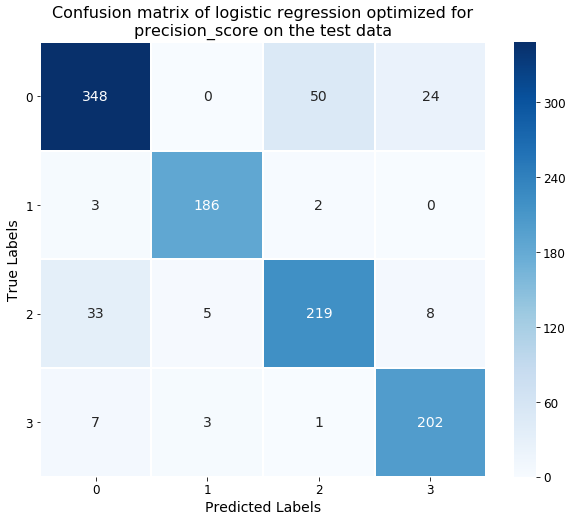

In [208]:
# GridSearch for logistic Clf
logit_param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10]
}

# Use GridSearch to find the best parameters.
logit_clf = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=1000)

scorers = {
    'precision_score': metrics.make_scorer(metrics.precision_score, average='micro'),
    'recall_score': metrics.make_scorer(metrics.recall_score, average='micro'),
    'f1_score': metrics.make_scorer(metrics.f1_score, average='micro')
}

def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=5)
    
    grid_search = GridSearchCV(logit_clf, param_grid=logit_param_grid, scoring=scorers,
                               refit=refit_score, cv=skf, return_train_score=True)
    grid_search.fit(X_train_res, y_train_res)

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    
    fig, ax = plt.subplots(figsize=(10, 8))

    fig.add_subplot(sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
                                linewidths=1, annot_kws={'fontsize': 14}))
    
    plt.title('Confusion matrix of logistic regression optimized for\n{} on the test data'.format(refit_score), fontsize=16)
    plt.ylabel('True Labels', fontsize=14)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(rotation='horizontal', fontsize=12)

    # Change font in scale
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=12)
    
    return grid_search

grid_logit_1 = grid_search_wrapper(refit_score='precision_score')

#### Confussion matrix shows that the classifier is performing decently. Class 2 if confused a few times with 0 and class 0 is confused woth 2 and 3.

In [209]:
results = pd.DataFrame(grid_logit_1.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_f1_score',
         'param_C', 'mean_train_precision_score']].round(3).head()

,mean_test_precision_score,mean_test_recall_score,mean_test_f1_score,param_C,mean_train_precision_score
2,0.879,0.879,0.879,0.1,0.885
4,0.879,0.879,0.879,10,0.885
3,0.879,0.879,0.879,1,0.885
1,0.875,0.875,0.875,0.01,0.878
0,0.867,0.867,0.867,0.001,0.868


#### Micro-averaged of the performance metrics shows that the performance of the optimized model is as good as a baseline model. This indicated that logistic regression would not perform any better.
#### Since classification of the misclassified users may be too hard, I will use gradient boosted trees quich focusses more and more on hard cases by fitting a tree to the residual of the previous tree.

In [210]:
# XG-Boost implementation requires that both test and training sets have the same columns names. Lets make a training df
X_train_res_df = pd.DataFrame(
    data = X_train_res,
    columns = X_test.columns
)

In [211]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train_res_df, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [212]:
y_pred = xgb_clf.predict(X_test)
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       408
           1       0.97      0.99      0.98       188
           2       0.91      0.91      0.91       266
           3       0.98      0.91      0.94       229

   micro avg       0.93      0.93      0.93      1091
   macro avg       0.94      0.94      0.94      1091
weighted avg       0.93      0.93      0.93      1091



#### The baseline XG-boost performs quite well and increase the performance from 0.88 to 0.93 micro-averaged f1-score.
#### Lets use gridsearch to optmized the parameters.

In [213]:
cv_params = {
    'n_estimators': [100, 250],
    'max_depth': [3,5,7],
    'min_child_weight': [1,3,5]
}

ind_params = {
    'learning_rate': 0.1,
    'random_state':6059,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'multi:softmax'
}

optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                             cv_params,
                             scoring = 'f1_micro',
                             cv = 5,
                             n_jobs = -1) 

optimized_GBM.fit(X_train_res_df, y_train_res)

y_pred = optimized_GBM.best_estimator_.predict(X_test)

In [223]:
cv_results = pd.DataFrame(optimized_GBM.cv_results_)

In [215]:
results = cv_results[['mean_test_score', 'mean_train_score', 'param_max_depth',
                      'param_min_child_weight', 'param_n_estimators']]
results.sort_values('mean_test_score', ascending=False)

,mean_test_score,mean_train_score,param_max_depth,param_min_child_weight,param_n_estimators
13,0.977946,1.000000,7,1,250
15,0.977057,1.000000,7,3,250
17,0.976169,1.000000,7,5,250
7,0.975725,1.000000,5,1,250
12,0.974541,0.999815,7,1,100
9,0.974393,0.999963,5,3,250
11,0.974245,0.999852,5,5,250
14,0.974097,0.999445,7,3,100
16,0.972173,0.997373,7,5,100
6,0.967584,0.994524,5,1,100


#### The model with 250 trees is cleary overfitting the data.
#### Lets stick to 100 trees and constrain the model a little more to avoid overfitting and try to get a model that generalizes better.
#### To more stringly constrain the model I will increase the possible values fro 'max_depth' and 'min_child_weight'

In [216]:
cv_params = {
    'max_depth': [5, 7, 10],
    'min_child_weight': [5, 10, 15]
}

ind_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'random_state':6059,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'multi:softmax'
}

optimized_GBM_2 = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                             cv_params,
                             scoring = 'f1_micro',
                             cv = 5,
                             n_jobs = -1) 

optimized_GBM_2.fit(X_train_res_df, y_train_res)

y_pred = optimized_GBM_2.predict(X_test)

In [222]:
cv_results_2 = pd.DataFrame(optimized_GBM_2.cv_results_)

In [218]:
results_2 = cv_results_2[['mean_test_score', 'mean_train_score', 'param_max_depth',
                          'param_min_child_weight']]
results_2.sort_values('mean_test_score', ascending=False)

,mean_test_score,mean_train_score,param_max_depth,param_min_child_weight
6,0.974393,0.999445,10,5
3,0.972173,0.997373,7,5
7,0.970841,0.995190,10,10
4,0.968176,0.993006,7,10
0,0.966400,0.990527,5,5
8,0.965660,0.990786,10,15
5,0.965364,0.988603,7,15
1,0.962256,0.986235,5,10
2,0.960332,0.982423,5,15


#### I managed to constrained the model, since it is not overfitting the training data, and also increase the micro-averaged f1-score. The model is performing better than baseline XG-boost (micro-average f1 0.93 vs 0.97) but also better than logistic regression (micro-average f1 0.88 vs 0.97)

In [219]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       413
           1       0.98      0.99      0.99       190
           2       0.97      0.94      0.95       274
           3       0.98      0.98      0.98       214

   micro avg       0.97      0.97      0.97      1091
   macro avg       0.97      0.97      0.97      1091
weighted avg       0.97      0.97      0.97      1091



#### Lastly, lets look at the confussion matrix for the best XG-boost model.

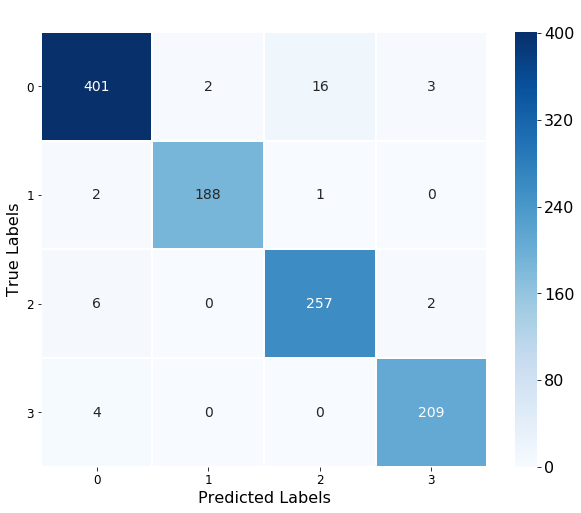

In [220]:
# heatmap for confusion matrix
def heatmap_conf_matrix(y_test, y_pred):
    
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    
    fig, ax = plt.subplots(figsize=(10, 8))

    sns.heatmap(conf_matrix, annot=True, ax=ax, fmt='g', cmap='Blues',
                linewidths=1, annot_kws={'fontsize': 14})
    
    plt.ylabel('True Labels', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(rotation='horizontal', fontsize=12)

    # Change font in scale
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=16)

heatmap_conf_matrix(y_test, y_pred)

#### Clearly the XG-boost model outperform the logistic regression model
- Misclassified class 0 went from 64 to 21 (~2/3 decrease)
- Misclassified class 1 went from 5 to 3 (40 % decrease)
- Misclassified class 2 went from 46 to 8 (~80 % decrease)
- Misclassified class 3 went from 11 to 4 (~60 % decrease)